[Python and R code templates be found here](https://github.com/GEOS300/Assignment03) to help get you started.


## Instructions

It is strongly recommended that you complete the assignment in Python or R, although you can complete it in excel/numbers if necessary.  They will download the data for you and get you started with a few blocks of code to make plots and tables.  If you are electing to complete the lab in excel, you can find all the relevant data files here [here](https://github.com/GEOS300/AssignmentData/).  **Note** these data are in .csv format.  If you plan to work in excel, you should save a copy of the data in a suitable excel format (e.g., .xlsx) before making any charts or doing any calculations.

Please upload your answers including all calculations, discussions, tables, and graphs in a single document (PDF or HTML file). Note that you can download your .ipynb file under 'File $\gg$ Download as $\gg$ HTLM or PDF via Latex' and submit this as your report. Label the report document with your name and your student number. Upload your answers to Canvas. **Do not attach a spreadsheet.**

**Make Sure** your student number is include on each plot you produce, and that each plot is using the correct units.



In this exercise you will use a 30-min data-set measured above an extensively flat cotton field near [Kettleman City, CA, US](http://www.eol.ucar.edu/rtf/projects/ebex2000/). The actual day / time is selected based on your student number, the timestamp you are responsible for can be found in (@tbl-dates). You will be provided with two tables: 

**Table1**: lists horizontal wind speeds $\overline{u}$ measured with cup-anemometers installed at six heights on a profile tower averaged over 30 minutes. Air temperature and pressure are also provided in the table header.

**Table2**: contains longitudinal wind $u$, lateral wind $v$ and vertical wind $w$ measured every second over the same 30 minutes by a fast-response anemometer located at 6.4 m height.

* For all questions assume neutral conditions, $z_d=0$, and $P_a$ = 100 kPa.


Last digit of student number | date (YYYmmddHHMM)
-----------------------------|-----
0 | 200008021530
1 | 200008031000
2 | 200008031030
3 | 200008031200
4 | 200008041030
5 | 200008041100
6 | 200008041130
7 | 200008041530
8 | 200008101230
9 | 200008101530


: The Timestamp you are responsible for analyzing in YYYY (Year) mm (month) dd (day) HH (hour) MM (minute) format.  The filename for your date will follow this format: YYYYmmddHHMM.txt.  e.g., wind202402141330.txt and turbulence202402141330.txt would be the files for February 14th, 2023 13:30.  If you are completing the assignment using Python or R, just edit the filename timestamp in the corresponding template. If you are completing the assignment by hand or in excel, you can find the data files [here](https://github.com/GEOS300/AssignmentData/tree/main/WesthamIslandSoilData). {#tbl-dates}


In [4]:
#| include: false
# Enter your information below
Student_Name = 'Fariha Islam'
Student_Number = 000000000
print(f'GEOS 300 Assignment Submission for {Student_Name}: {Student_Number}')

GEOS 300 Assignment Submission for Fariha Islam: 0


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [6]:
# Import the data from github & parse the timestamp for each record
## **NOTE**  Make sure to edit the TimeStamp variable so it corresponds to the timestamp you were assigned.
data_url='https://raw.githubusercontent.com/GEOS300/AssignmentData/main/KettlemanCityCottonField/'
TimeStamp = '200008031200'

# Format the links to Table 1 (mean wind speed) and Table 2 (high frequency wind data)
Table_1_url = f'{data_url}wind{TimeStamp}.txt'
Table_2_url = f'{data_url}turbulence{TimeStamp}.txt'

# Both tables have 7 rows of metadata at the top.  We'll parse and print those before reading the rest of the data
header_rows = 7

print('Table 1 Metadata:')
Table_1_header_info = pd.read_fwf(Table_1_url,widths=[100],nrows=header_rows,header=None)
for i,row in Table_1_header_info.iterrows():
    print(row.values[0])

Table_1 = pd.read_csv(Table_1_url,skiprows=header_rows,na_values=-9999)

print('Table 1 Data:')
print(Table_1)

print('\n\n')

print('Table 2 Metadata:')
Table_2_header_info = pd.read_fwf(Table_2_url,widths=[100],nrows=header_rows,header=None)
for i,row in Table_2_header_info.iterrows():
    print(row.values[0])

# Pandas (pd here) allows us to set a timestamp as an index which lets us easily parse time series data
Table_2 = pd.read_csv(Table_2_url,skiprows=header_rows,
    parse_dates={'TIMESTAMP':['YYYY-MM-DD HH:MM:SS']},index_col='TIMESTAMP',na_values=-9999)


print('Table 2 Data preview:')
Table_2.head()


Table 1 Metadata:
# EBEX 2000, Kettleman City, CA, USA
# Wind profile measured by cup anemometers
# Start: 2000/08/03 12:00 PST
# Average values over 30 min
# Air temperature: 31.1 deg C
# Air pressure: 101.380 kPa
Table 1 Data:
   Height (m)  Wind Speed (m/s)
0        0.95              1.38
1        1.55              1.63
2        2.35              1.79
3        3.72              2.01
4        6.15              2.28
5        9.05              2.42



Table 2 Metadata:
# EBEX 2000, Kettleman City, CA, USA
# Turbulence data measured at 1 Hz by fast-anemometer at 6.4 m
# Start: 2000/08/03 12:00 PST
# u (m/s) : longitudinal wind vector component
# v (m/s) : lateral wind vector component
# w (m/s) : vertical wind vector component
Table 2 Data preview:


,u (m/s),v (m/s),w (m/s)
TIMESTAMP,,,
2000-08-03 12:00:00,2.3323,-0.6325,-0.0209
2000-08-03 12:00:01,2.3164,0.0145,-0.4015
2000-08-03 12:00:02,2.0627,0.1010,-0.0800
2000-08-03 12:00:03,1.9424,-0.2551,0.0327
2000-08-03 12:00:04,1.7992,-0.0528,-0.0670


## Question 1

Estimate $z_0$ from the measured values vertical wind profile provided.  Indicate your estimate of $z_0$ in m and produce a log wind profile plot.  You can either use a spreadsheet/software or by hand using [semi-logarithmic graph paper](https://www.eeweb.com/wp-content/uploads/semi-log-graph-paper.pdf). **Note**: If you solve this question using a semi-logarithmic paper, use a ruler and your graphical judgement (subjective) to create the best fit through the points.


In [7]:
# Hint 1 >>
# This function can be used to calculate the "natural logarithm" (ln):
# np.log()

# Hint 2 >>
# The "polyfit" function can be used to estimate the slope (m) and intercept (b) of a line (Y=mX+b), 
# with the following syntax:
# m,b np.polyfit(X,Y,1)

# Hint 3 >>
# The following set of commands can add a new first row a table 
# 1) Crate a new table with one row (without data values)
# If you know the values you want to add, just replace np.nan with the value
# new_first_row = pd.DataFrame(data={
#                             'Height (m)':np.nan,
#                             'Wind Speed (m/s)':np.nan,
#                              # Any other columns follow the same pattern
#                             },index=[-1])

# 2) Concatenate the new row to the top of the original table then reset the index
# Wind_Profile = pd.concat([new_first_row,Table_1]).reset_index()

m = 2.145410313240084; b = -3.0198925388130617


Text(0.5, 0, 'U (m/s)')

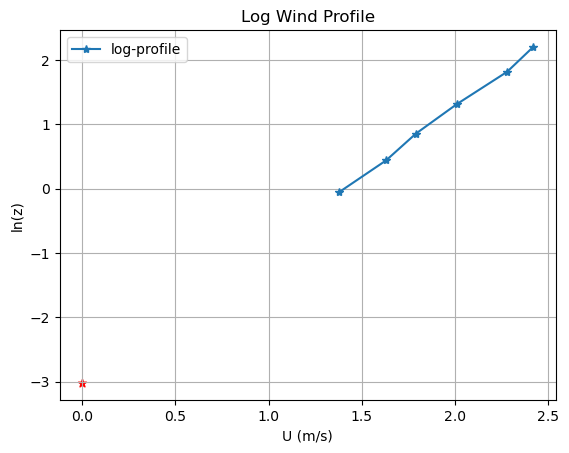

In [8]:
X = (Table_1['Wind Speed (m/s)'])
Y = np.log(Table_1['Height (m)'])
Table_1['lnz'] = np.log(Table_1['Height (m)'])
m,b=np.polyfit(Table_1['Wind Speed (m/s)'],Table_1['lnz'],1)

print(f'm = {m}; b = {b}')

#Creating a scatter plot

import matplotlib.pyplot as plt
fit, ax = plt.subplots()
Table_1.plot(x='Wind Speed (m/s)',y='lnz',ax=ax,marker='*',label='log-profile')
ax.scatter(0,b,marker='*',color='r',label='intercept')
ax.grid()
ax.set_title('Log Wind Profile')
ax.set_ylabel('ln(z)')
ax.set_xlabel('U (m/s)')


In [9]:
#Calculating z0
import numpy as np
𝑧0 = np.exp(b)
print(f' Answer:  The estimate of 𝑧0 is: {𝑧0} metres')

 Answer:  The estimate of 𝑧0 is: 0.04880646288064823 metres


## Question 2

Based on the slope of the curve in Question 1, calculate the friction velocity $u_{\ast}$.


In [10]:
# Insert your code or text answer here.  If writing a text answer in .ipynb, change the cell type to Markdown.  If writing a text answer in .Rmd, just delete the tick marks surrounding the block

In [11]:
k = 0.41
𝑢_star = k*m
print(f' Answer: The friction velocity is: {𝑢_star} m/s')

 Answer: The friction velocity is: 0.8796182284284344 m/s


##  Question 3

Estimate the surface shear stress $\tau_0$ from the result in Question 2 and with help of Appendix A3 (p. 392 ff.) in T. R. Oke, 'Boundary Layer Climates available on Canvas.


In [12]:
#Pressure = 100 kPa under neutral conditions
#Temperature = 31.1 degC
#Findind value of rho at 31.1 degC
# Given values for interpolation
x0 = 30.0  # temperature in °C for known value 1
y0 = 1.149  # density in kg m⁻³ for known value 1
x1 = 35.0  # temperature in °C for known value 2
y1 = 1.131  # density in kg m⁻³ for known value 2
x = 31.1  # temperature in °C we are interpolating for

# Linear interpolation formula
y = y0 + ((x - x0) * (y1 - y0) / (x1 - x0))

rho = y  # This will give us the interpolated value for density at 31.1 °C
print(f' The air density is: {rho}  kg/m^3')
#Calculating Reynold's stress
τ0 = (u_star**2)*(rho)
print(f'Answer: The surface shear stress is: {τ0} kg/ms^2 or Nm^-2 or Pa')

 The air density is: 1.14504  kg/m^3
Answer: The surface shear stress is: 0.8859497699413075 kg/ms^2 or Nm^-2 or Pa


## Question 4

Estimate the eddy diffusivities for momentum $K_M$ using the wind gradients $\Delta \overline{u}$ in Table 1 between (a) $z=0.95$ and $1.55$ m, (b) $z=1.55$ and $2.35$ m, (c) $z=2.35$ and $3.72$ m, (d) $z=3.72$ and $6.15$ m, and (e) $z=6.15$ and $9.05$ m. How does $K_M$ change with height? Explain why.


In [13]:
# Insert your code or text answer here.  If writing a text answer in .ipynb, change the cell type to Markdown.  If writing a text answer in .Rmd, just delete the tick marks surrounding the block

In [14]:
# Function to calculate the eddy diffusivity for momentum (KM)
def calculate_KM(u0, u1, z0, z1, tau, rho):
    delta_u_bar = u1 - u0
    delta_z = z1 - z0
    wind_speed_gradient = delta_u_bar / delta_z
    KM = tau / (rho * wind_speed_gradient)
    return delta_u_bar, delta_z, wind_speed_gradient, KM

# Given shear stress (τ) and air density (rho) (constant for all calculations)
τ = 0.8859497699413075  # Shear stress in N/m^2
rho = 1.14504  # Air density in kg/m^3

# Wind speeds at different heights from the table
wind_speeds = {
    0.95: 1.38,  # Wind speed at z = 0.95 m in m/s
    1.55: 1.63,  # Wind speed at z = 1.55 m in m/s
    2.35: 1.79,  # Wind speed at z = 2.35 m in m/s
    3.72: 2.01,  # Wind speed at z = 3.72 m in m/s
    6.15: 2.28,  # Wind speed at z = 6.15 m in m/s
    9.05: 2.42   # Wind speed at z = 9.05 m in m/s
}

# Heights for calculation
height_pairs = [
    (0.95, 1.55),
    (1.55, 2.35),
    (2.35, 3.72),
    (3.72, 6.15),
    (6.15, 9.05)
]

# Calculate KM for each height interval
KM_values = {}
for z0, z1 in height_pairs:
    u0 = wind_speeds[z0]
    u1 = wind_speeds[z1]
    delta_u_bar, delta_z, wind_speed_gradient, KM = calculate_KM(u0, u1, z0, z1, τ, rho)
    KM_values[(z0, z1)] = KM
    print(f'For z={z0}m to z={z1}m, Δu̅={delta_u_bar}m/s, Δz={delta_z}m, gradient={wind_speed_gradient}s^-1, KM={KM}m^2/s')





For z=0.95m to z=1.55m, Δu̅=0.25m/s, Δz=0.6000000000000001m, gradient=0.41666666666666663s^-1, KM=1.856947746680586m^2/s
For z=1.55m to z=2.35m, Δu̅=0.16000000000000014m/s, Δz=0.8m, gradient=0.20000000000000018s^-1, KM=3.8686411389178836m^2/s
For z=2.35m to z=3.72m, Δu̅=0.21999999999999975m/s, Δz=1.37m, gradient=0.16058394160583922s^-1, KM=4.818216691197738m^2/s
For z=3.72m to z=6.15m, Δu̅=0.27m/s, Δz=2.43m, gradient=0.1111111111111111s^-1, KM=6.963554050052197m^2/s
For z=6.15m to z=9.05m, Δu̅=0.14000000000000012m/s, Δz=2.9000000000000004m, gradient=0.04827586206896555s^-1, KM=16.02722757551695m^2/s


In [15]:
# Printing the KM values for each height interval
print(f' Answer: The KM value for (a) z=0.95 to 1.55 m is: {KM_values[(0.95, 1.55)]} m^2/s.')
print(f'The KM value for (b) z=1.55 to 2.35 m is: {KM_values[(1.55, 2.35)]} m^2/s.')
print(f'The KM value for (c) z=2.35 to 3.72 m is: {KM_values[(2.35, 3.72)]} m^2/s.')
print(f'The KM value for (d) z=3.72 to 6.15 m is: {KM_values[(3.72, 6.15)]} m^2/s.')
print(f'The KM value for (e) z=6.15 to 9.05 m is: {KM_values[(6.15, 9.05)]} m^2/s.')

 Answer: The KM value for (a) z=0.95 to 1.55 m is: 1.856947746680586 m^2/s.
The KM value for (b) z=1.55 to 2.35 m is: 3.8686411389178836 m^2/s.
The KM value for (c) z=2.35 to 3.72 m is: 4.818216691197738 m^2/s.
The KM value for (d) z=3.72 to 6.15 m is: 6.963554050052197 m^2/s.
The KM value for (e) z=6.15 to 9.05 m is: 16.02722757551695 m^2/s.


- ### Discussion: 
Based on the calculated values for the eddy diffusivity for momentum (KM), we can observe that KM increases with height above the ground. This pattern indicates that the turbulent mixing is more effective at higher altitudes compared to closer to the surface. Some reasons:

a. Surface Roughness: Near the ground, surface roughness elements like vegetation, buildings, and other obstacles absorb energy and generate turbulence, but they also create drag that tends to slow down the air movement, reducing the efficiency of momentum transfer.

b. Thermal Stratification: The stability of the atmosphere can vary with height. Near the surface, especially during the day, the ground heats the air, causing thermal turbulence which can enhance mixing. However, this effect diminishes with height as the influence of the ground's heating decreases.

c. Shear Production: The velocity gradient (wind speed change with height) is typically larger closer to the ground due to the no-slip condition at the surface, leading to shear production of turbulence. As one moves away from the surface, the gradient often becomes less steep, and the production of turbulence due to shear decreases.

d. Turbulent Transport: Turbulence can transport momentum upwards from the surface, leading to increased mixing as you move away from the ground. This results in higher KM values at greater heights.

e. Decreased Damping: The influence of the surface, which acts to dampen turbulence, decreases with height. Therefore, the turbulent eddies can become larger and less constrained by the surface, leading to increased eddy diffusivities.

f. Eddy Size (l): The size of the turbulent eddies can also increase with height. Larger eddies are capable of transporting quantities like momentum over larger distances, which increases the effective diffusion.

## Question 5

From the values in Table 1, calculate the aerodynamic resistance of the momentum flux $r_{a_M}$ for the layer from the surface to 9.05 m. 


In [16]:
# Insert your code or text answer here.  If writing a text answer in .ipynb, change the cell type to Markdown.  If writing a text answer in .Rmd, just delete the tick marks surrounding the block

In [17]:
z0 =  0 # in metres #at surface z = 0m
z2 = 9.05 
u0 = 0  #in m/s #zero at surface under neutraL conditions
u2 = 2.42 #in m/s
del_u = u2 - u0

rAM = (rho*del_u)/τ0
print(f" Answer: The aerodynamic resistance r_aM is: {rAM} s/m")


 Answer: The aerodynamic resistance r_aM is: 3.1277132113071984 s/m


## Question 6

From the turbulence data provided in Table 2, calculate $\overline{u}$, $\overline{v}$, and $\overline{w}$.  How does the magnitude of $\overline{u}$ compare to $\overline{v}$, and $\overline{w}$?


In [18]:
# Insert your code or text answer here.  If writing a text answer in .ipynb, change the cell type to Markdown.  If writing a text answer in .Rmd, just delete the tick marks surrounding the block

In [19]:
import pandas as pd
import numpy as np

# Function to calculate the mean of a given vector component
def calculate_mean(vector):
    return np.mean(vector)



# Calculate the mean for 'u', 'v', and 'w'
u_mean = calculate_mean(Table_2['u (m/s)'])
v_mean = calculate_mean(Table_2['v (m/s)'])
w_mean = calculate_mean(Table_2['w (m/s)'])

# Calculate the magnitudes comparison
u_greater_v = np.abs(u_mean) > np.abs(v_mean)
u_greater_w = np.abs(u_mean) > np.abs(w_mean)
v_greater_w = np.abs(v_mean) > np.abs(w_mean)

# Results
(u_mean, v_mean, w_mean, u_greater_v, u_greater_w, v_greater_w)

print(f'The mean longitudinal wind speed is : {u_mean} m/s')
print(f'The mean lateral wind speed is : {v_mean} m/s')
print(f'The mean vertical wind speed is : {w_mean} m/s')

The mean longitudinal wind speed is : 2.4026935 m/s
The mean lateral wind speed is : 1.666666666702257e-07 m/s
The mean vertical wind speed is : -4.444444444434086e-07 m/s


- ### How does the magnitude of mean u compare to mean v and mean w?

Answer:  
The magnitude of the mean longitudinal wind speed u_bar is significantly greater than the magnitudes of both v_bar and w_bar. This implies that the mean airflow  is predominantly in the direction of u, with very little lateral or vertical movement on average. This could suggest that the flow is relatively stable and consistent in the longitudinal direction with minimal turbulence in the lateral and vertical directions, at least in terms of the mean values. 
The negative value of the mean vertical wind speed w_bar suggests that, on average, there is a downward movement in the vertical component of the wind during the period of measurement. This downward motion is part of the natural turbulence and vertical exchange processes in the atmosphere. In meteorological terms, this could be indicative of subsiding air, which is often associated with high-pressure systems and more stable atmospheric conditions. It can also occur due to the effects of the terrain, thermal effects, or structures that alter the flow of the wind.


## Question 7

From the data in Table 2 calculate $\overline{u^{\prime 2}}$, $\overline{v^{\prime 2}}$, and $\overline{w^{\prime 2}}$. Name those parameters.


In [20]:
import pandas as pd

Table_2['u (m/s)'] = Table_2['u (m/s)'].astype(float)
Table_2['v (m/s)'] = Table_2['v (m/s)'].astype(float)
Table_2['w (m/s)'] = Table_2['w (m/s)'].astype(float)


# Calculate the deviations from the mean for each component
u_prime_squared = (Table_2['u (m/s)'] - u_mean) ** 2
v_prime_squared = (Table_2['v (m/s)'] - v_mean) ** 2
w_prime_squared = (Table_2['w (m/s)'] - w_mean) ** 2

# Calculate the mean of these squared deviations (variances)
u_var = u_prime_squared.mean()
v_var = v_prime_squared.mean()
w_var = w_prime_squared.mean()

# Store the variances
variances = {
    'u_prime_squared_mean': u_var,
    'v_prime_squared_mean': v_var,
    'w_prime_squared_mean': w_var
}

variances
print(f'The mean variance of u component is: {u_var} m/s')
print(f'The mean variance of v component is: {v_var} m/s')
print(f'The mean variance of w component is: {w_var} m/s')

The mean variance of u component is: 0.19374024626330555 m/s
The mean variance of v component is: 0.1627990179388611 m/s
The mean variance of w component is: 0.08094865447758025 m/s


- ### Naming the Parameters: These parameters represent the variances of the fluctuating components of the wind velocity field:

$\overline{u^{\prime 2}}$: Variance of the longitudinal (u-component) wind speed fluctuations. It indicates the spread of the fluctuations in the wind speed in the direction of the flow.

$\overline{v^{\prime 2}}$: Variance of the lateral (v-component) wind speed fluctuations. It represents the spread of the side-to-side fluctuations perpendicular to the wind direction.

$\overline{w^{\prime 2}}$: Variance of the vertical (w-component) wind speed fluctuations. This measures the intensity of the up and down fluctuations in the wind speed.



## Question 8

From the data in Table 2 calculate the turbulence intensities $I_u$, $I_v$, and $I_w$.


In [21]:
# Insert your code or text answer here.  If writing a text answer in .ipynb, change the cell type to Markdown.  If writing a text answer in .Rmd, just delete the tick marks surrounding the block

In [22]:
M = np.sqrt(u_mean**2 + v_mean**2 + w_mean**2)
M
sigma_u = np.sqrt(u_var)
sigma_v = np.sqrt(v_var)
sigma_w = np.sqrt(w_var)

I_u = sigma_u/M
I_v = sigma_v/M
I_w = sigma_w/M

print(f'The turblulent intensity of u is Iu = {I_u}')
print(f'The turblulent intensity of v is Iv = {I_v}')
print(f'The turblulent intensity of w is Iw = {I_w}')


The turblulent intensity of u is Iu = 0.18319412854850403
The turblulent intensity of v is Iv = 0.16792970183700617
The turblulent intensity of w is Iw = 0.11841492484474081


## Question 9

From the data in Table 2 calculate the mean turbulent kinetic energy per unit mass $\overline{e}$. What is the ratio of $\overline{e}$ to the mean kinetic energy per unit mass?


In [23]:
# Insert your code or text answer here.  If writing a text answer in .ipynb, change the cell type to Markdown.  If writing a text answer in .Rmd, just delete the tick marks surrounding the block

In [24]:
# Calculating MKE per unit mass
MKE_per_mass = 0.5 * (u_mean**2 + v_mean**2 + w_mean**2)

# Calculating TKE using the prime squared means (which are the variances of u', v', and w')
TKE = 0.5 * (u_var + v_var + w_var)

# Calculating the ratio of TKE to MKE per unit mass
ratio_TKE_to_MKE = TKE / MKE_per_mass

print(f"Mean Turbulent Kinetic Energy (TKE) per unit mass: {TKE} m^2/s^2")
print(f"Ratio of TKE(e_bar) to Mean Kinetic Energy per unit mass (MKE/m): {ratio_TKE_to_MKE}")

Mean Turbulent Kinetic Energy (TKE) per unit mass: 0.21874395933987345 m^2/s^2
Ratio of TKE(e_bar) to Mean Kinetic Energy per unit mass (MKE/m): 0.0757825679196972


## Question 10

Which of the three wind components, $u$, $v$ or $w$, contains most turbulent kinetic energy per unit mass. Speculate about the shape of the eddies.


In [25]:
# Insert your code or text answer here.  If writing a text answer in .ipynb, change the cell type to Markdown.  If writing a text answer in .Rmd, just delete the tick marks surrounding the block

In [26]:

# Calculate the turbulent kinetic energy (TKE) per unit mass for each component
TKE_u = 0.5 * u_var
TKE_v = 0.5 * v_var
TKE_w = 0.5 * w_var

# Print the TKE for each component
print(f"TKE for u component: {TKE_u} m^2/s^2")
print(f"TKE for v component: {TKE_v} m^2/s^2")
print(f"TKE for w component: {TKE_w} m^2/s^2")


TKE for u component: 0.09687012313165277 m^2/s^2
TKE for v component: 0.08139950896943055 m^2/s^2
TKE for w component: 0.040474327238790124 m^2/s^2


- ### Q. Speculating shape of eddies based on individual TKE of u,v,w: 

Answer: 
The distribution of turbulent kinetic energy (TKE) across the 𝑢, 𝑣, and 𝑤 wind components reveals a nuanced portrait of atmospheric turbulence. The 𝑢 component, with the highest TKE, hosts large, elongated eddies that dominate energy and momentum transfer, closely aligned with the primary flow direction and significantly influencing mixing processes. In comparison, the 𝑣 component's moderately high TKE suggests less intense turbulence, with eddies that are less elongated and more varied in shape, possibly affected by secondary flow patterns and contributing to crosswind mixing. The 𝑤 component, marked by the lowest TKE, indicates smaller, isotropic vertical eddies with suppressed energy due to atmospheric stability or boundary layer effects, leading to less efficient vertical mixing. This highlights the anisotropic nature of atmospheric turbulence, with horizontal components playing a more significant role in mixing and dispersion than vertical movements.








## Question 11

From the data in Table 2 calculate (a) $\overline{u^{\prime}v^{\prime}}$ and (b) $\overline{u^{\prime}w^{\prime}}$


In [27]:
import pandas as pd
import numpy as np

# Calculate the fluctuation components by subtracting the mean from each value
Table_2['u_prime'] = Table_2['u (m/s)'] - u_mean
Table_2['v_prime'] = Table_2['v (m/s)'] - v_mean
Table_2['w_prime'] = Table_2['w (m/s)'] - w_mean

# Now calculate the products of the fluctuations
Table_2['u_prime_v_prime'] = Table_2['u_prime'] * Table_2['v_prime']
Table_2['u_prime_w_prime'] = Table_2['u_prime'] * Table_2['w_prime']

# Calculate the mean of the products to get Reynolds stresses
u_v_prime_mean = Table_2['u_prime_v_prime'].mean()
u_w_prime_mean = Table_2['u_prime_w_prime'].mean()

# Print the results
print(f"a. Mean of u'v': {u_v_prime_mean}")
print(f"b. Mean of u'w': {u_w_prime_mean}")


a. Mean of u'v': -0.006531817643361109
b. Mean of u'w': -0.05364919793066667


## Question 12

Calculate $r_{uv}$ and $r_{uw}$. Discuss your results.


In [28]:
ruv = (u_v_prime_mean)/(sigma_u*sigma_v)
ruw = (u_w_prime_mean)/(sigma_u*sigma_w)
print(f'The correlation coefficient ruv is: {ruv}')
print(f'The correlation coefficient ruv is: {ruw}')

The correlation coefficient ruv is: -0.03677885777548367
The correlation coefficient ruv is: -0.4283990436498764


- ### Discuss: 
1. For ruv, which is the correlation between the u and v components, the value of -0.03677885777548367 indicates a very weak negative correlation, indicating when the wind velocity fluctuates in the u-direction, there's a very slight tendency for the v-direction to fluctuate in the opposite direction, but this tendency is so weak that it's almost negligible. 

2. For ruw, which is the correlation between the u and w components, has a value of -0.4283990436498764, indicating a moderate negative correlation. This suggests that when the wind fluctuates in the u-direction, there is a more noticeable tendency for the w-direction to fluctuate in the opposite direction. 

## Question 13

Plot a scatter graph of $u^{\prime}$ ($x$-axis) vs. $w^{\prime}$ ($y$-axis). Comment your graph and discuss if it looks like you expected.


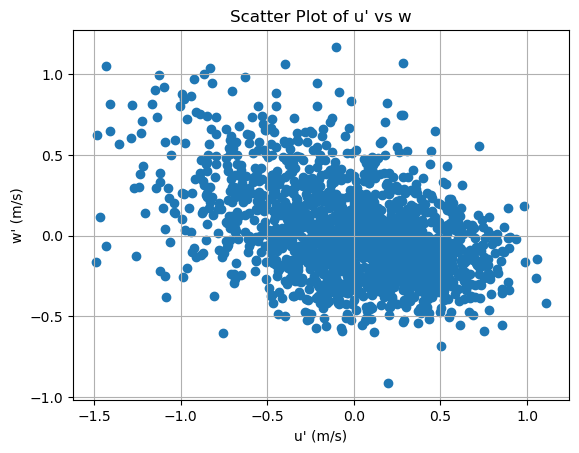

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 'u_prime' and 'w_prime' data from Table 2 as numpy arrays
# Replace 'u_prime' and 'w_prime' with the actual variable names you have for the data

u_prime = np.array([Table_2['u_prime']])  # replace with your u' data
w_prime = np.array([Table_2['w_prime']])  # replace with your w' data

plt.scatter(u_prime, w_prime)
plt.xlabel("u' (m/s)")
plt.ylabel("w' (m/s)")
plt.title("Scatter Plot of u' vs w")
plt.grid(True)
plt.show()


- ### Comment: 

There is a negative moderate correleation. We can see that at the downdraft, the horizontal motion or u component is less and at the downdraft, the horizontal motion is more. We get a net downward transport of momentum at the Earth's surface. According to the quadrant analysis of momentum exchange, there is slow upward moving eddy with negative u and positive w component and fast horizontal wind due to sweeping of faster moving eddies toward the surface, resulting in a negative w_prime and positive u_prime.

## Question 14

Using your result in question 11 (b), calculate the friction velocity $u_{\ast}$ based on the high-frequency data and compare it to your answer in question 2.


In [30]:
#From, 11b
import numpy as np

u_star2 = np.sqrt(-u_w_prime_mean)
print(f'The friction velocity is: {u_star2} m/s')

The friction velocity is: 0.2316229650329748 m/s


- ### Compare: 

1. The friction velocity in question 2 was a generic definition which is based on the slope of velocity profile in conjunction with von Kármán's constant. Since, it is based on a vertical profile of the wind speed at different heights, it represents spatially-averaged conditions that may not be directly comparable to the high-frequency, single-point measurements used for Question 14. It may not be valid under all atmospheric condition. The slope from Question 2 may represent a more averaged condition over a longer period or a different time or represent more spatially-averaged condition that may not be directly comparable to the high-frequency, single-point measurements used for ques 14.



2. Uses Reynold's decomposition to measure u_star value from question 14 which is more simpler as it's near the Earth's surface. It depends largely on wind speed. The higher the wind speed, the higher the friction velocity. it also depends on roughness of a given surface. A smooth surface at a same wind speed will have lower u_star value than a rough surface with the same wind speed. And it depends on the intensity of thermal convection. If there's a lot of heat in the Earth surface, the vertical motion would be quite different than in a stable boundary layer condition. 